# Exploratory Data Analysis.

_Jorge III Altamirano Astorga, Luz Aurora Hernández Martínez, Ita-Andehui Santiago Castillejos._

## Reading Files

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os, gzip, json, re
import seaborn as sns
from dplython import (DplyFrame, X, diamonds, select, sift,
  sample_n, sample_frac, head, arrange, mutate, group_by,
  summarize, DelayFunction, dfilter)
import dplython
from plotnine import *
import pandas as pd
from IPython.display import display, Markdown

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/home/jaa6766/.conda/envs/cuda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
/home/jaa6766/.conda/envs/cuda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
/home/jaa6766/.conda/envs/cuda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
/home/jaa6766/.conda/envs/cuda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size cha

In [2]:
base_dir = "data/airdata"
data_dir = os.path.join(
    os.getcwd(),
    base_dir
)
airdata = []

display(Markdown(f"Listing data files from: {data_dir}"))

generator = (file for file in os.listdir(data_dir) if (file.find(".json.gz") > 0))
for filegz in generator:
    display(Markdown(f"* Loading {filegz}"))
    try:
        with gzip.open(os.path.join(data_dir, filegz), 'rt') as file:
            for (i, line) in enumerate(file):
                #print(f"{filegz}:{i}", line.strip())
                json_line = json.loads(line.strip())
                airdata.append(json_line)
                    
    except EOFError:
        continue
    except Exception as e:
        print(f"Error while reading file {filegz}", type(e))
        raise e
display(Markdown("Done!"))

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Listing data files from: /home/jaa6766/Documents/jorge3a/itam/deeplearning/dlfinal/data/airdata

* Loading air-20210212-060408.json.gz

* Loading air-20210212-060529.json.gz

* Loading air-20210212-060534.json.gz

* Loading air-20210212-060545.json.gz

* Loading air-20210212-153737.json.gz

* Loading air-20210212-153808.json.gz

* Loading air-20210212-153921.json.gz

* Loading air-20210218-233000.json.gz

* Loading air-20210308-213952.json.gz

* Loading air-20210308-214511.json.gz

* Loading air-20210326-110304.json.gz

* Loading air-20210520-235254.json.gz

* Loading air-20210617-141714.json.gz

* Loading air-20210415-234052.json.gz

* Loading air-20210627-224727.json.gz

* Loading air-20210723-084450.json.gz

* Loading air-20210812-211858.json.gz

* Loading air-20210822-191723.json.gz

* Loading air-20210827-131714.json.gz

* Loading air-20210828-132805.json.gz

* Loading air-20210830-121252.json.gz

Done!

In [3]:
%%time
df = pd.DataFrame(airdata)
df["datetime"] = pd.to_datetime(df["datetime"], unit='s')
df["year"] = [dt.year for dt in df.datetime]
df["month"] = [dt.month for dt in df.datetime]
df["day"] = [dt.day for dt in df.datetime]
df["hour"] = [dt.hour for dt in df.datetime]
df["minute"] = [dt.minute for dt in df.datetime]
df.head()

CPU times: user 2min 55s, sys: 5.54 s, total: 3min 1s
Wall time: 3min 1s


,temperature,pressure,humidity,gasResistance,IAQ,iaqAccuracy,datetime,year,month,day,hour,minute
0,21.54,777.41,43.93,151328,37.5,1,2021-02-12 06:04:09.089621067,2021,2,12,6,4
1,21.56,777.41,43.89,152702,35.6,1,2021-02-12 06:04:12.087778807,2021,2,12,6,4
2,21.53,777.41,43.97,151328,37.5,1,2021-02-12 06:04:15.072475433,2021,2,12,6,4
3,21.51,777.41,44.03,151464,38.5,1,2021-02-12 06:04:18.070170164,2021,2,12,6,4
4,21.51,777.41,44.05,152425,36.9,1,2021-02-12 06:04:21.061994791,2021,2,12,6,4


In [4]:
df.shape

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


(6285103, 12)

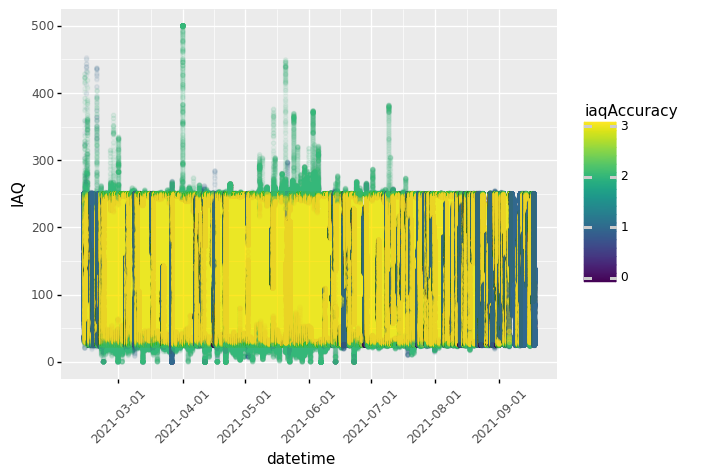

<ggplot: (8759878048277)>

In [5]:
(
    ggplot(df, aes(x = "datetime", y = "IAQ", color="iaqAccuracy")) +
    geom_jitter(alpha=0.05, size=1.25) +
    theme(axis_text_x=element_text(angle=45))
)

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


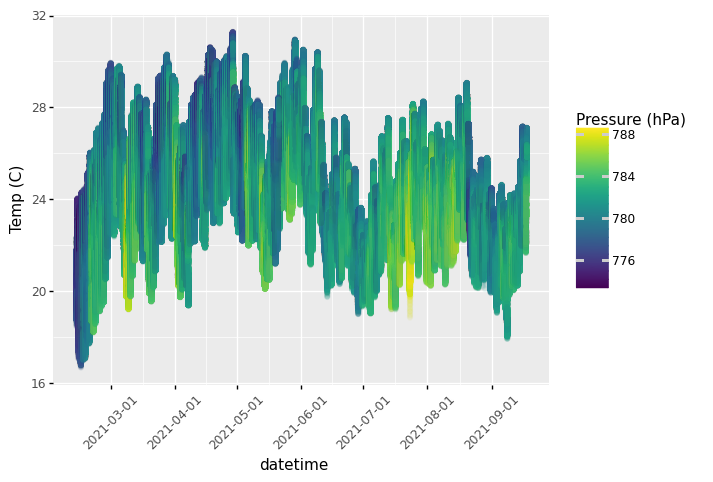

<ggplot: (8759869828161)>

In [6]:
(
    ggplot(df, aes(x = "datetime", y = "temperature", color="pressure")) +
    geom_jitter(alpha=0.05) +
    theme(axis_text_x=element_text(angle=45)) +
    labs(y="Temp (C)", color="Pressure (hPa)")
)

## Hourly Plots

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


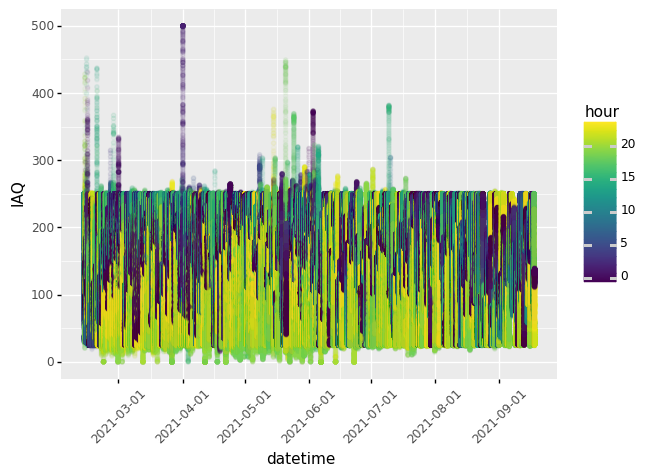

<ggplot: (8759792563449)>

In [7]:
(
    ggplot(df, aes(x = "datetime", y = "IAQ", color="hour")) +
    geom_jitter(alpha=0.05, size=1.25) +
    theme(axis_text_x=element_text(angle=45))
)

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


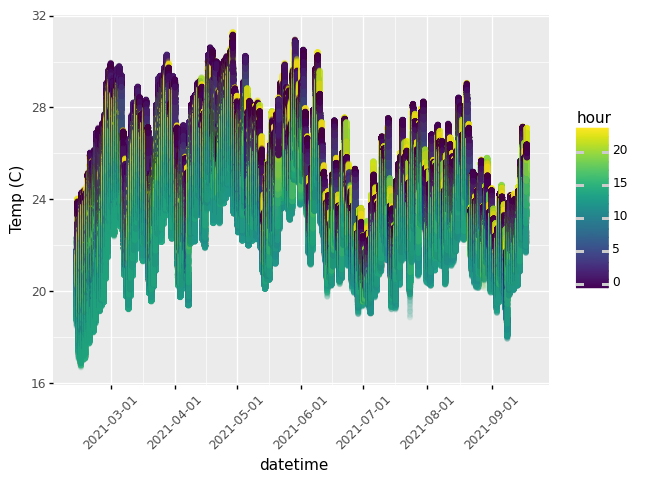

<ggplot: (8759792572893)>

In [8]:
(
    ggplot(df, aes(x = "datetime", y = "temperature", color="hour")) +
    geom_jitter(alpha=0.05) +
    theme(axis_text_x=element_text(angle=45)) +
    labs(y="Temp (C)")
)

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


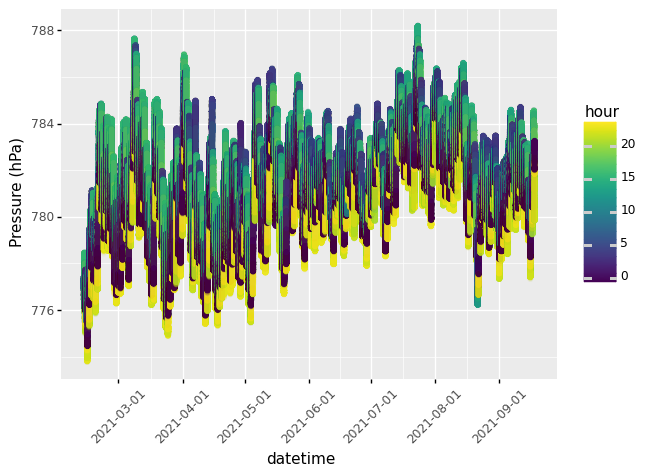

<ggplot: (8759792567581)>

In [9]:
(
    ggplot(df, aes(x = "datetime", y = "pressure", color="hour")) +
    geom_jitter(alpha=0.05) +
    theme(axis_text_x=element_text(angle=45)) +
    labs(y="Pressure (hPa)")
)

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


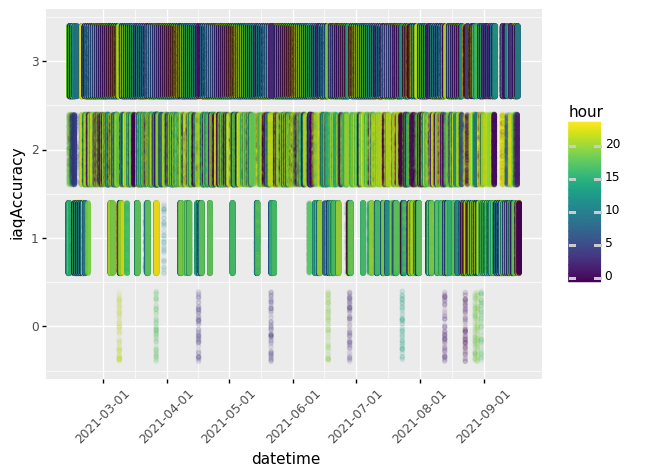

<ggplot: (8759792217949)>

In [10]:
(
    ggplot(df, aes(x = "datetime", y = "iaqAccuracy", color="hour")) +
    geom_jitter(alpha=0.05, size=1.25) +
    theme(axis_text_x=element_text(angle=45))
)

In [11]:
df.to_pickle("data/airdata/air.pickle")

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


## SINAICA

In [143]:
base_dir = "data/sinaica/" 
data_dir = os.path.join(
    os.getcwd(),
    base_dir
)

df = pd.read_pickle("data/airdata/air.pickle")

display(Markdown(f"Listing data files from: {data_dir}..."))

generator = (file for file in os.listdir(data_dir) 
             if (re.match(r"Datos SINAICA - [-A-ZáéíóúÁÉÍÓÚa-z0-9. ]{30,80}\.csv", file) is not None))
sinaica = None

for (j, file_csv) in enumerate(generator):
    #display(Markdown(f"{i+1}. File \"{file_csv}\""))

    try:
        station, sensor = re.match(
            r"Datos SINAICA - ([A-ZáéíóúÁÉÍÓÚa-z. ]{3,20}) - ([A-Z0-9a-z.]+) - [-0-9 ]+\.csv", 
             file_csv).groups()
        #display(Markdown(f"   * {station}, {sensor}"))
        df2 = pd.read_csv(os.path.join(data_dir, file_csv))
        df2 = df2.assign(Estacion=station)
        sinaica = pd.concat([sinaica, df2])
        sinaica["Hora"] = sinaica[["Hora"]].replace("- .*$", "", regex=True)
        sinaica["Fecha"] = pd.to_datetime(sinaica["Fecha"] + " " + sinaica["Hora"])
        #display(df2.head(3))
    except Exception as e:
        print(f"Error while reading file {file_csv}", type(e))
        raise e

if sinaica is None:
    print("Loading pickle prev data...")
    sinaica = pd.read_pickle("data/sinaica/sinaica.pickle")

sinaica = sinaica.sort_values(by=["Fecha", "Estacion", "Parámetro"])
sinaica = sinaica[(sinaica["Fecha"] >= "2021-01-01")].copy()
#display(Markdown(f"Done reading {j+1} files!"))
display(pd.concat([sinaica.head(5), sinaica.tail(5)]))

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Listing data files from: /home/jaa6766/Documents/jorge3a/itam/deeplearning/dlfinal/data/sinaica/...

Loading pickle prev data...


,Parámetro,Fecha,Valor,Unidad,Estacion
1,CO,2021-01-01,0.600,ppm,Camarones
1,NO,2021-01-01,0.006,ppm,Camarones
1,NO2,2021-01-01,0.029,ppm,Camarones
1,NOx,2021-01-01,0.034,ppm,Camarones
1,O3,2021-01-01,0.011,ppm,Camarones
34,SO2,2021-10-08,0.002,ppm,Merced
35,SO2,2021-10-08,0.001,ppm,Merced
36,SO2,2021-10-08,0.001,ppm,Merced
37,SO2,2021-10-08,0.000,ppm,Merced
38,SO2,2021-10-08,0.001,ppm,Merced


In [144]:
sinaica

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,Parámetro,Fecha,Valor,Unidad,Estacion
1,CO,2021-01-01,0.600,ppm,Camarones
1,NO,2021-01-01,0.006,ppm,Camarones
1,NO2,2021-01-01,0.029,ppm,Camarones
1,NOx,2021-01-01,0.034,ppm,Camarones
1,O3,2021-01-01,0.011,ppm,Camarones
...,...,...,...,...,...
34,SO2,2021-10-08,0.002,ppm,Merced
35,SO2,2021-10-08,0.001,ppm,Merced
36,SO2,2021-10-08,0.001,ppm,Merced
37,SO2,2021-10-08,0.000,ppm,Merced


### Nearby Air Quality Monitoring Stations

These are the air quality monitoring stations that are close to "Camarones", which is the one nearby to our sensor:

![Mapa de Estaciones Cercanas](img/mapa.jpg)

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


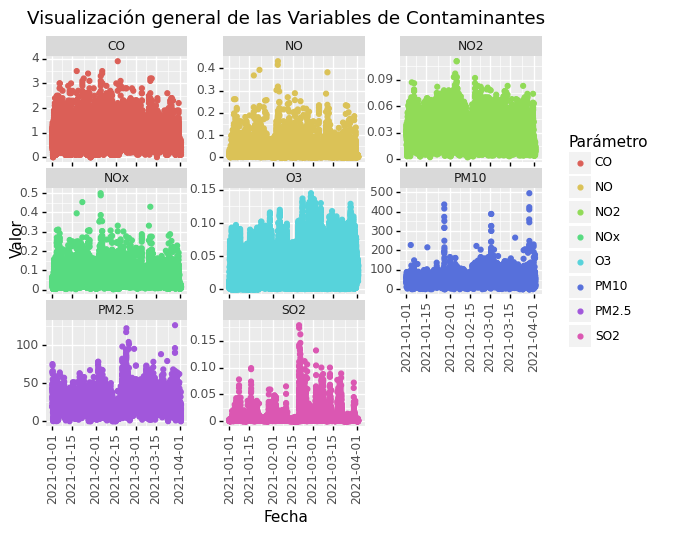

<ggplot: (8759791742085)>

In [22]:
(
    ggplot(sinaica) +
    geom_point(aes(x="Fecha", y="Valor", color="Parámetro")) +
    facet_wrap("Parámetro", scales="free") +
    labs(title="Visualización general de las Variables de Contaminantes") +
    theme(axis_text_x=element_text(angle=90),
          subplots_adjust={'wspace': 0.25, 'hspace': 0.25}
         )
)

### Camarones Air Quality Monitoring Station

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


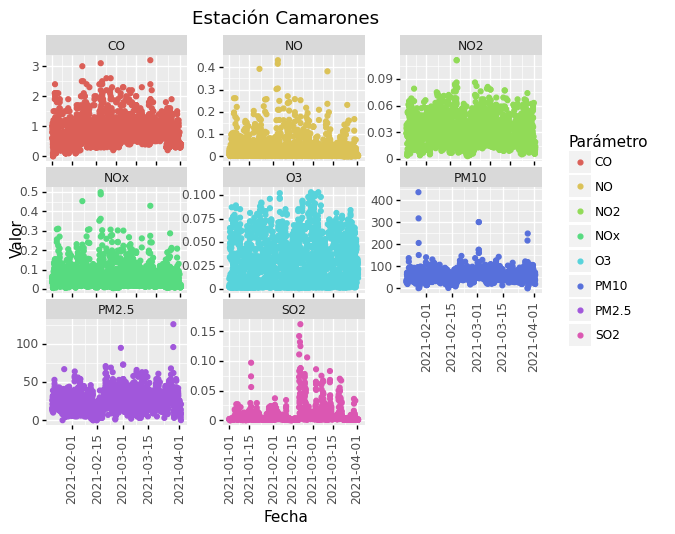

<ggplot: (8759877268541)>

In [23]:
(
    ggplot(sinaica[(sinaica["Estacion"] == "Camarones")]) + 
    geom_point(aes(x="Fecha", y="Valor", color="Parámetro")) +
    facet_wrap("Parámetro", scales="free") +
    labs(title="Estación Camarones") + 
    theme(axis_text_x=element_text(angle=90),
          subplots_adjust={'wspace': 0.25, 'hspace': 0.25}
         )
)

In [24]:
sinaica.to_pickle("data/sinaica/sinaica.pickle")

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


## Sensor Data

These are the hourly averages of the sensor in order to make them match the government air quality monitoring stations that report hourly vs every 3 seconds.

In [25]:
ddf = DplyFrame(df)
ddf.head(5)

,temperature,pressure,humidity,gasResistance,IAQ,iaqAccuracy,datetime,year,month,day,hour,minute
0,21.54,777.41,43.93,151328,37.5,1,2021-02-12 06:04:09.089621067,2021,2,12,6,4
1,21.56,777.41,43.89,152702,35.6,1,2021-02-12 06:04:12.087778807,2021,2,12,6,4
2,21.53,777.41,43.97,151328,37.5,1,2021-02-12 06:04:15.072475433,2021,2,12,6,4
3,21.51,777.41,44.03,151464,38.5,1,2021-02-12 06:04:18.070170164,2021,2,12,6,4
4,21.51,777.41,44.05,152425,36.9,1,2021-02-12 06:04:21.061994791,2021,2,12,6,4


In [26]:
(
    ddf >> 
    dfilter(X.datetime >= '2021-03-01 06:00:00', 
            X.datetime <= '2021-03-01 06:02:00',
           ) >>
    dplython.head(3)
)

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/dplython/dplython.py:196: DeprecationWarning: 'dfilter' is deprecated. Please use 'sift' instead.


,temperature,pressure,humidity,gasResistance,IAQ,iaqAccuracy,datetime,year,month,day,hour,minute
490473,28.06,780.7,30.37,175863,198.1,3,2021-03-01 06:00:01.807887316,2021,3,1,6,0
490474,28.05,780.7,30.38,176417,197.7,3,2021-03-01 06:00:04.803511858,2021,3,1,6,0
490475,28.05,780.7,30.41,175313,198.0,3,2021-03-01 06:00:07.798833609,2021,3,1,6,0


In [27]:
%%time
ddf = (
    ddf >>
    sift(X.iaqAccuracy > 0) >> ## descartamos las lecturas del sensor incorrectas
    group_by(X.year, X.month, X.day, X.hour) >>
    summarize(temperature=X.temperature.mean(),
              pressure=X.pressure.mean(),
              humidity=X.humidity.mean(),
              gasResistance=X.gasResistance.mean(),
              IAQ=X.IAQ.mean(),
              iaqAccuracy=X.iaqAccuracy.mode()
             )
)

ddf

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


CPU times: user 31.8 s, sys: 7.06 s, total: 38.9 s
Wall time: 38.9 s


,year,month,day,hour,temperature,pressure,humidity,gasResistance,IAQ,iaqAccuracy
0,2021,2,12,6,21.557391,777.271496,44.289745,1.439648e+05,90.755292,1
1,2021,2,12,7,21.153699,777.077872,43.183375,1.497397e+05,81.831588,1
2,2021,2,12,8,20.653242,776.620657,42.604564,1.537118e+05,86.220615,1
3,2021,2,12,9,20.406470,776.213214,42.223995,1.491061e+05,138.266030,1
4,2021,2,12,10,20.051380,776.202968,42.269584,1.428894e+05,198.164339,1
...,...,...,...,...,...,...,...,...,...,...
5223,2021,9,17,21,26.476714,780.191339,50.048186,1.043343e+06,37.047504,1
5224,2021,9,17,22,26.849135,780.496165,50.588394,1.050633e+06,38.850749,1
5225,2021,9,17,23,26.281820,782.067298,54.032219,9.918547e+05,81.164589,1
5226,2021,9,18,0,26.222995,782.853860,55.496814,9.266802e+05,128.776123,1


Estadísticas de los valores de las lecturas

In [28]:
ddf.describe()

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,year,month,day,hour,temperature,pressure,humidity,gasResistance,IAQ,iaqAccuracy
count,5228.0,5228.000000,5228.000000,5228.000000,5228.000000,5228.000000,5228.000000,5.228000e+03,5228.000000,5228.000000
mean,2021.0,5.509946,15.633512,11.506121,24.349677,781.624137,43.442600,6.950943e+05,157.429759,2.551071
std,0.0,2.093404,8.655932,6.921888,2.489229,2.187106,12.554327,3.111298e+05,69.918421,0.817749
min,2021.0,2.000000,1.000000,0.000000,17.282542,774.004780,8.750125,9.540458e+04,22.751331,1.000000
25%,2021.0,4.000000,8.000000,6.000000,22.518177,780.216749,32.662378,5.044701e+05,98.951158,3.000000
50%,2021.0,6.000000,16.000000,12.000000,24.198175,781.726205,43.999339,6.915713e+05,171.485025,3.000000
75%,2021.0,7.000000,23.000000,18.000000,26.116874,783.156527,54.322785,8.638399e+05,219.580799,3.000000
max,2021.0,9.000000,31.000000,23.000000,31.066215,787.963968,70.166841,2.716493e+06,255.292928,3.000000


## Air Quality Government Data

In [29]:
sinaica

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,Parámetro,Fecha,Valor,Unidad,Estacion
1,CO,2021-01-01 00:00:00,0.600,ppm,Camarones
1,NO,2021-01-01 00:00:00,0.006,ppm,Camarones
1,NO2,2021-01-01 00:00:00,0.029,ppm,Camarones
1,NOx,2021-01-01 00:00:00,0.034,ppm,Camarones
1,O3,2021-01-01 00:00:00,0.011,ppm,Camarones
...,...,...,...,...,...
425,NOx,2021-04-01 23:00:00,0.014,ppm,Tlalnepantla
701,O3,2021-04-01 23:00:00,0.029,ppm,Tlalnepantla
681,PM10,2021-04-01 23:00:00,55.000,µg/m³,Tlalnepantla
679,PM2.5,2021-04-01 23:00:00,22.000,µg/m³,Tlalnepantla


In [30]:
dsinaica = DplyFrame(sinaica)
dsinaica2 = (
    dsinaica.
    pivot_table(index=["Fecha", ], columns=["Estacion", "Parámetro"], values="Valor", 
               )
)
dsinaica2.columns = ["_".join(x).strip() for x in dsinaica2.columns]
dsinaica2.insert(0, "Fecha", dsinaica2.index)
dsinaica2.reset_index(drop=True, inplace=True)
dsinaica2

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,Fecha,Camarones_CO,Camarones_NO,Camarones_NO2,Camarones_NOx,Camarones_O3,Camarones_PM10,Camarones_PM2.5,Camarones_SO2,FES Acatlán_CO,...,Miguel Hidalgo_O3,Miguel Hidalgo_SO2,Tlalnepantla_CO,Tlalnepantla_NO,Tlalnepantla_NO2,Tlalnepantla_NOx,Tlalnepantla_O3,Tlalnepantla_PM10,Tlalnepantla_PM2.5,Tlalnepantla_SO2
0,2021-01-01 00:00:00,0.6,0.006,0.029,0.034,0.011,NaN,NaN,0.002,0.4,...,0.009,0.003,0.6,NaN,0.030,0.034,0.012,37.0,19.0,0.002
1,2021-01-01 01:00:00,1.0,0.021,0.038,0.059,0.002,NaN,NaN,0.002,0.6,...,0.006,0.003,0.6,NaN,0.026,0.029,0.013,42.0,29.0,0.003
2,2021-01-01 02:00:00,0.8,0.013,0.035,0.049,0.003,NaN,NaN,0.001,0.9,...,0.003,0.002,0.7,NaN,0.032,0.036,0.006,58.0,43.0,0.002
3,2021-01-01 03:00:00,1.0,0.031,0.034,0.065,0.002,NaN,NaN,0.001,0.8,...,0.004,0.002,0.7,NaN,0.033,0.039,0.004,59.0,41.0,0.002
4,2021-01-01 04:00:00,0.6,0.005,0.029,0.034,0.005,NaN,NaN,0.001,1.0,...,0.006,0.002,0.7,NaN,0.032,0.038,0.004,64.0,46.0,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,2021-04-01 19:00:00,0.4,0.003,0.011,0.013,0.016,69.0,7.0,0.001,0.3,...,0.023,0.000,0.3,0.009,0.017,0.025,0.017,52.0,24.0,0.003
2167,2021-04-01 20:00:00,0.4,0.002,0.011,0.012,0.018,71.0,9.0,0.001,0.2,...,0.024,0.000,0.4,0.004,0.015,0.019,0.020,22.0,10.0,0.005
2168,2021-04-01 21:00:00,0.4,0.002,0.013,0.015,0.016,37.0,9.0,0.001,0.2,...,0.023,0.000,0.3,0.002,0.014,0.017,0.021,21.0,14.0,0.002
2169,2021-04-01 22:00:00,0.4,0.002,0.019,0.021,0.012,19.0,0.0,0.001,0.1,...,0.027,0.000,0.3,0.002,0.011,0.013,0.022,11.0,7.0,0.001


In [31]:
def describe_with_na(dataframe):
    dna = dataframe.isna()
    dna = dna.astype('int').sum()
    dna.name = "NAs"
    
    dataframe = dataframe.describe()
    dataframe = dataframe.append(dna)
    dataframe = dataframe.T
    dataframe.insert(0, "Estacion", dataframe.index)
    return dataframe

dsinaica2_describe = describe_with_na(dsinaica2)
dsinaica2_describe

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,Estacion,count,mean,std,min,25%,50%,75%,max,NAs
Camarones_CO,Camarones_CO,2050.0,0.771805,0.430131,0.000,0.500,0.700,1.0000,3.200,121.0
Camarones_NO,Camarones_NO,2042.0,0.025181,0.045487,0.000,0.002,0.006,0.0260,0.432,129.0
Camarones_NO2,Camarones_NO2,2042.0,0.031787,0.015682,0.003,0.020,0.031,0.0420,0.111,129.0
Camarones_NOx,Camarones_NOx,2042.0,0.056961,0.054418,0.004,0.022,0.039,0.0710,0.499,129.0
Camarones_O3,Camarones_O3,2042.0,0.025693,0.024107,0.001,0.004,0.018,0.0420,0.103,129.0
Camarones_PM10,Camarones_PM10,1616.0,58.066213,26.906212,0.000,41.000,55.000,71.0000,437.000,555.0
Camarones_PM2.5,Camarones_PM2.5,1604.0,25.158978,12.946419,0.000,16.000,24.000,33.0000,126.000,567.0
Camarones_SO2,Camarones_SO2,2042.0,0.006598,0.013053,0.000,0.002,0.003,0.0050,0.162,129.0
FES Acatlán_CO,FES Acatlán_CO,2020.0,0.634901,0.370808,0.100,0.400,0.500,0.8000,2.900,151.0
FES Acatlán_NO,FES Acatlán_NO,1304.0,0.014301,0.024926,0.000,0.002,0.004,0.0130,0.215,867.0


In [32]:
dsinaica2_describe = (
    dsinaica2_describe[["Estacion", "NAs"]]
)[dsinaica2_describe["Estacion"] != "Fecha"]
dsinaica2_describe.index.name = ""
dsinaica2_describe.reset_index(inplace=True)
dsinaica2_describe[["Estacion", "NAs"]].sort_values("NAs", 
                                                    ascending=False, 
                                                    inplace=True)
dsinaica2_describe

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,,Estacion,NAs
0,Camarones_CO,Camarones_CO,121.0
1,Camarones_NO,Camarones_NO,129.0
2,Camarones_NO2,Camarones_NO2,129.0
3,Camarones_NOx,Camarones_NOx,129.0
4,Camarones_O3,Camarones_O3,129.0
5,Camarones_PM10,Camarones_PM10,555.0
6,Camarones_PM2.5,Camarones_PM2.5,567.0
7,Camarones_SO2,Camarones_SO2,129.0
8,FES Acatlán_CO,FES Acatlán_CO,151.0
9,FES Acatlán_NO,FES Acatlán_NO,867.0


/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


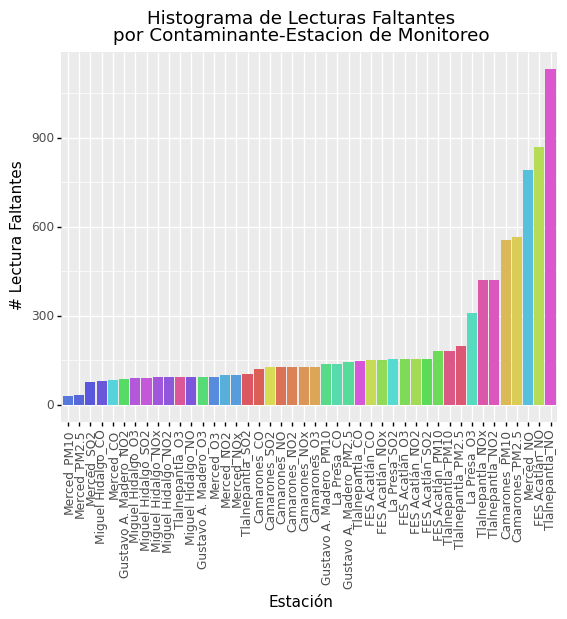

<ggplot: (8759875176429)>

In [33]:
(
    ggplot(dsinaica2_describe) +
    geom_col(aes(x="reorder(Estacion, (NAs))", y="NAs", fill="Estacion"),
             show_legend=False) +
    theme(axis_text_x=element_text(rotation=90)) +
    labs(x="Estación", y="# Lectura Faltantes", 
         title="Histograma de Lecturas Faltantes\n"+
         "por Contaminante-Estacion de Monitoreo")
)

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


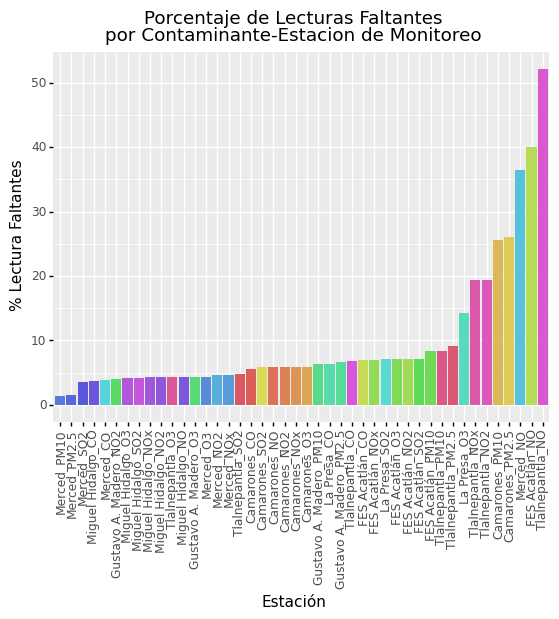

<ggplot: (8759685738189)>

In [34]:
(
    ggplot(dsinaica2_describe) +
    geom_col(aes(x="reorder(Estacion, (NAs))", y="100*NAs/dsinaica2.shape[0]", 
                 fill="Estacion"),
             show_legend=False) +
    theme(axis_text_x=element_text(rotation=90)) +
    labs(x="Estación", y="% Lectura Faltantes", 
         title="Porcentaje de Lecturas Faltantes\n"+
         "por Contaminante-Estacion de Monitoreo")
)

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


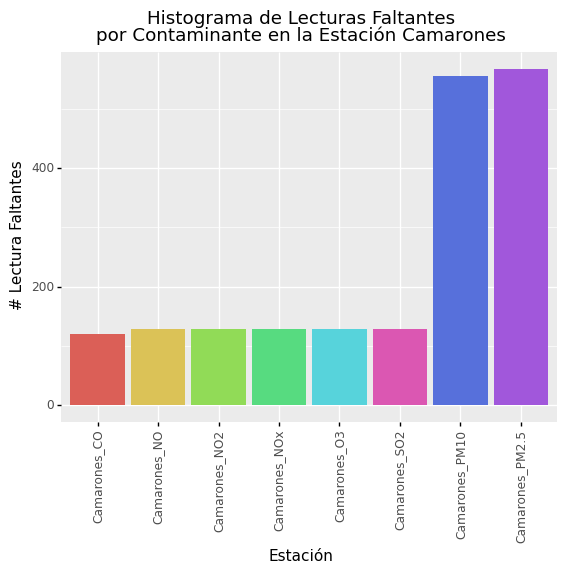

<ggplot: (8759791694833)>

In [35]:
(
    ggplot(dsinaica2_describe[dsinaica2_describe["Estacion"].str.match("Camarones")]) +
    geom_col(aes(x="reorder(Estacion, (NAs))", y="NAs", fill="Estacion"),
             show_legend=False) +
    theme(axis_text_x=element_text(rotation=90)) +
    labs(x="Estación", y="# Lectura Faltantes", 
         title="Histograma de Lecturas Faltantes\n"+
         "por Contaminante en la Estación Camarones")
)

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


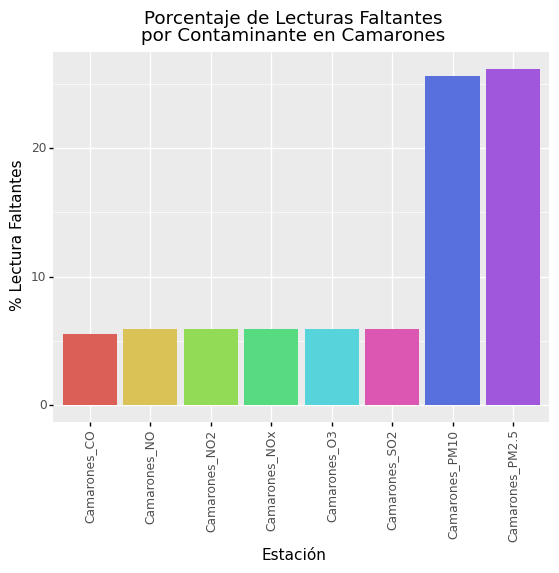

<ggplot: (8759792099749)>

In [36]:
(
    ggplot(dsinaica2_describe[dsinaica2_describe["Estacion"].str.match("Camarones")]) +
    geom_col(aes(x="reorder(Estacion, (NAs))", y="100*NAs/dsinaica2.shape[0]", 
                 fill="Estacion"),
             show_legend=False) +
    theme(axis_text_x=element_text(rotation=90)) +
    labs(x="Estación", y="% Lectura Faltantes", 
         title="Porcentaje de Lecturas Faltantes\n"+
         "por Contaminante en Camarones")
)

In [37]:
dsinaica2_describe[dsinaica2_describe["Estacion"].str.match("Camarones")]

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,,Estacion,NAs
0,Camarones_CO,Camarones_CO,121.0
1,Camarones_NO,Camarones_NO,129.0
2,Camarones_NO2,Camarones_NO2,129.0
3,Camarones_NOx,Camarones_NOx,129.0
4,Camarones_O3,Camarones_O3,129.0
5,Camarones_PM10,Camarones_PM10,555.0
6,Camarones_PM2.5,Camarones_PM2.5,567.0
7,Camarones_SO2,Camarones_SO2,129.0


In [38]:
dsinaica2_describe[dsinaica2_describe["Estacion"].str.match("Merced")]

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,,Estacion,NAs
22,Merced_CO,Merced_CO,84.0
23,Merced_NO,Merced_NO,790.0
24,Merced_NO2,Merced_NO2,101.0
25,Merced_NOx,Merced_NOx,101.0
26,Merced_O3,Merced_O3,95.0
27,Merced_PM10,Merced_PM10,29.0
28,Merced_PM2.5,Merced_PM2.5,34.0
29,Merced_SO2,Merced_SO2,77.0


/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


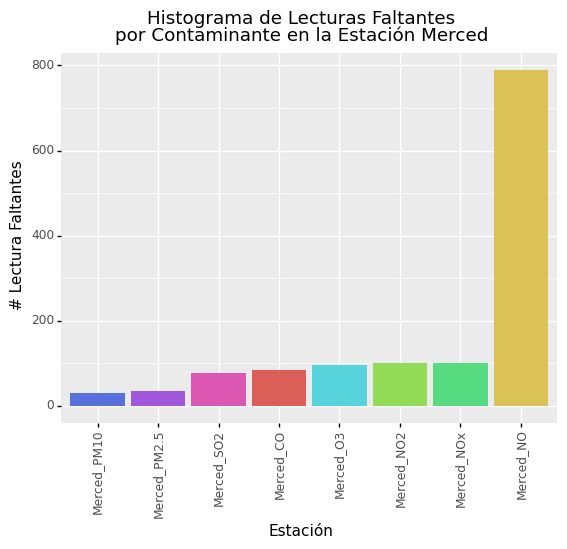

<ggplot: (8759792245861)>

In [39]:
(
    ggplot(dsinaica2_describe[dsinaica2_describe["Estacion"].str.match("Merced")]) +
    geom_col(aes(x="reorder(Estacion, (NAs))", y="NAs", fill="Estacion"),
             show_legend=False) +
    theme(axis_text_x=element_text(rotation=90)) +
    labs(x="Estación", y="# Lectura Faltantes", 
         title="Histograma de Lecturas Faltantes\n"+
         "por Contaminante en la Estación Merced")
)

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


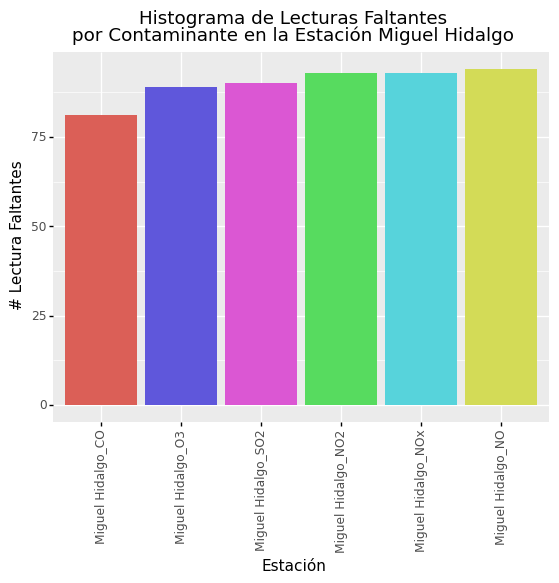

<ggplot: (8759791713777)>

In [40]:
(
    ggplot(dsinaica2_describe[dsinaica2_describe["Estacion"].str.match("Miguel Hidalgo")]) +
    geom_col(aes(x="reorder(Estacion, (NAs))", y="NAs", fill="Estacion"),
             show_legend=False) +
    theme(axis_text_x=element_text(rotation=90)) +
    labs(x="Estación", y="# Lectura Faltantes", 
         title="Histograma de Lecturas Faltantes\n"+
         "por Contaminante en la Estación Miguel Hidalgo")
)

In [41]:
dsinaica2.to_pickle("data/sinaica/dsinaica.pickle")

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


## Weather Data 

OpenWeatherMap Data

In [103]:
%%time
#read OpenWeatherData
weather = pd.read_csv("data/openweathermap/2f101ea00e7759ea8723b848ac8b18d0.csv")
#get right date time
weather["dt"] = pd.to_datetime(weather["dt"], unit='s')
#select columns to reduce size
weather = weather[["dt", "temp", "feels_like", "temp_min", "temp_max", 
         "pressure", "humidity", "wind_speed", "wind_deg", "rain_1h", "rain_3h", 
         "clouds_all", "weather_id", "weather_main"]]
#impute rain data with zeroes instead of NaN
weather.fillna(value=0, inplace=True)
#select only the right time frame
weather = weather[weather.dt >= df.datetime.min()].reset_index(drop=True)
weather.head(2)

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


CPU times: user 1.06 s, sys: 118 ms, total: 1.17 s
Wall time: 1.17 s


,dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,clouds_all,weather_id,weather_main
0,2021-02-12 07:00:00,13.87,12.46,5.21,13.92,1020,44,0.0,0,0.0,0.0,1,800,Clear
1,2021-02-12 08:00:00,12.81,11.37,4.21,12.92,1020,47,0.0,0,0.0,0.0,1,800,Clear


/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


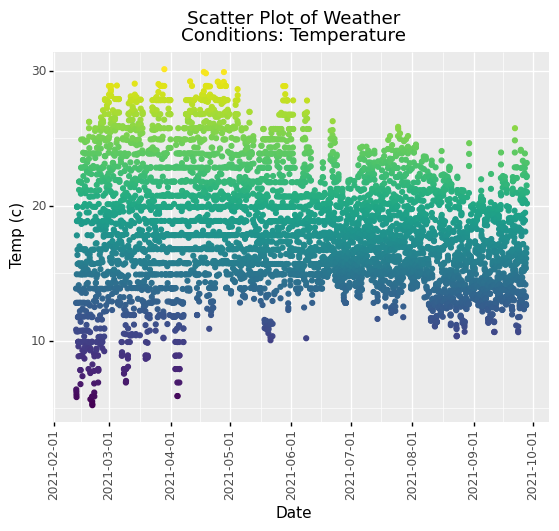

<ggplot: (8759871460657)>

In [122]:
(
  ggplot(weather) +
  geom_point(aes(x="dt", y="temp", colour="temp"),
             show_legend=False) +
  theme(axis_text_x=element_text(rotation=90)) +
  labs(x="Date", y="Temp (c)",
       title="Scatter Plot of Weather\n" + 
       "Conditions: Temperature")
)

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 37'. Pick better value with 'binwidth'.


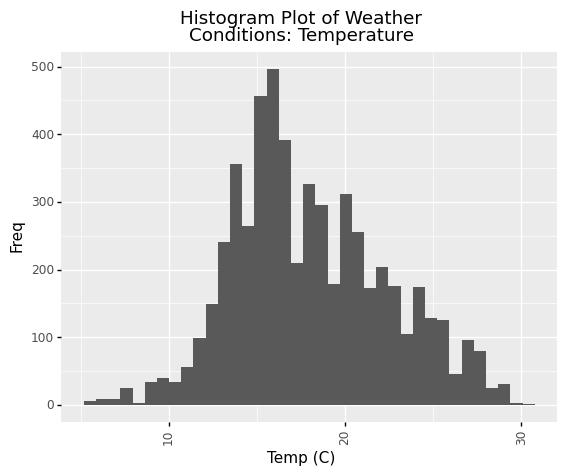

<ggplot: (8759871700921)>

In [137]:
(
  ggplot(weather) +
  geom_histogram(aes(x="temp"),
             show_legend=False) +
  theme(axis_text_x=element_text(rotation=90)) +
  labs(x="Temp (C)", y="Freq",
       title="Histogram Plot of Weather\n" + 
       "Conditions: Temperature")
)

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


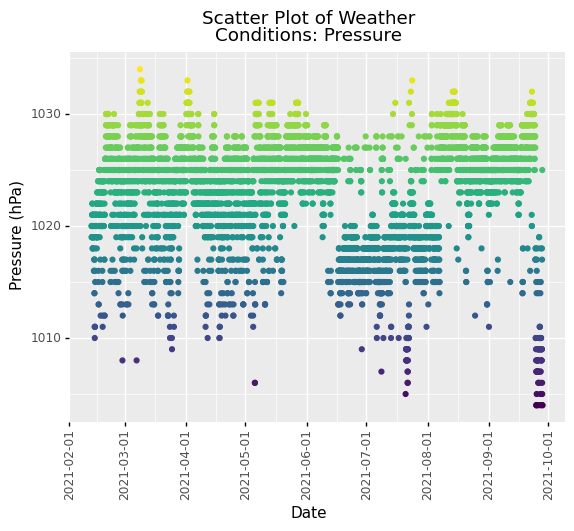

<ggplot: (8759871516885)>

In [142]:
(
  ggplot(weather) +
  geom_point(aes(x="dt", y="pressure", colour="pressure"),
             show_legend=False) +
  theme(axis_text_x=element_text(rotation=90)) +
  labs(x="Date", y="Pressure (hPa)",
       title="Scatter Plot of Weather\n" + 
       "Conditions: Pressure")
)

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 34'. Pick better value with 'binwidth'.


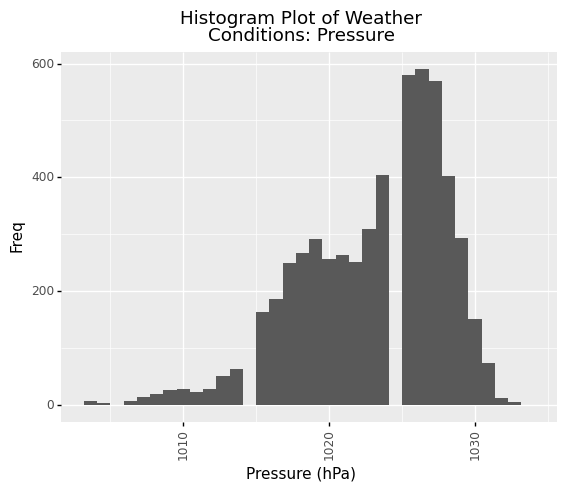

<ggplot: (8759871192141)>

In [141]:
(
  ggplot(weather) +
  geom_histogram(aes(x="pressure"),
             show_legend=False) +
  theme(axis_text_x=element_text(rotation=90)) +
  labs(x="Pressure (hPa)", y="Freq",
       title="Histogram Plot of Weather\n" + 
       "Conditions: Pressure")
)

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


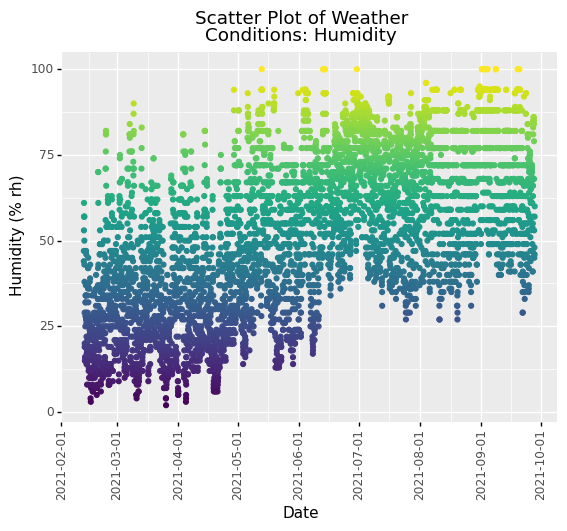

<ggplot: (8759872460273)>

In [130]:
(
  ggplot(weather) +
  geom_point(aes(x="dt", y="humidity", colour="humidity"),
             show_legend=False) +
  theme(axis_text_x=element_text(rotation=90)) +
  labs(x="Date", y="Humidity (% rh)",
       title="Scatter Plot of Weather\n" + 
       "Conditions: Humidity")
)

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 25'. Pick better value with 'binwidth'.


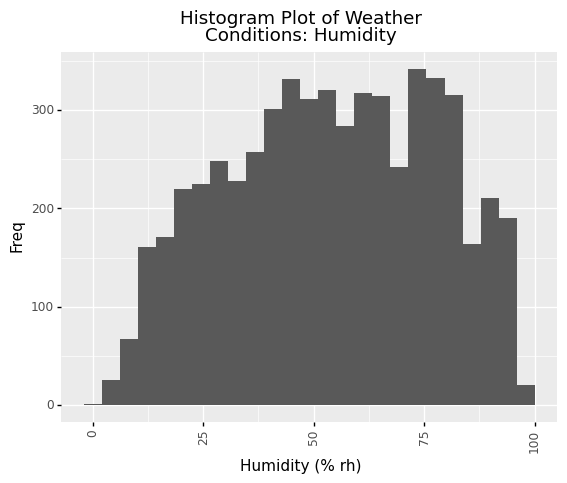

<ggplot: (8759872421517)>

In [131]:
(
  ggplot(weather) +
  geom_histogram(aes(x="humidity"),
             show_legend=False) +
  theme(axis_text_x=element_text(rotation=90)) +
  labs(x="Humidity (% rh)", y="Freq",
       title="Histogram Plot of Weather\n" + 
       "Conditions: Humidity")
)

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


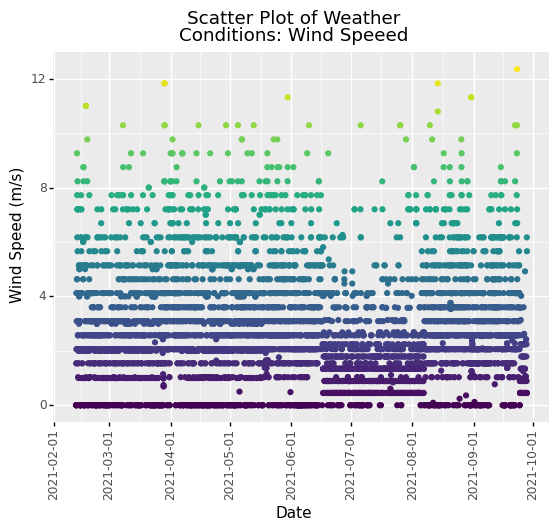

<ggplot: (8759871546769)>

In [139]:
(
  ggplot(weather) +
  geom_point(aes(x="dt", y="wind_speed", colour="wind_speed"),
             show_legend=False) +
  theme(axis_text_x=element_text(rotation=90)) +
  labs(x="Date", y="Wind Speed (m/s)",
       title="Scatter Plot of Weather\n" + 
       "Conditions: Wind Speeed")
)

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 43'. Pick better value with 'binwidth'.


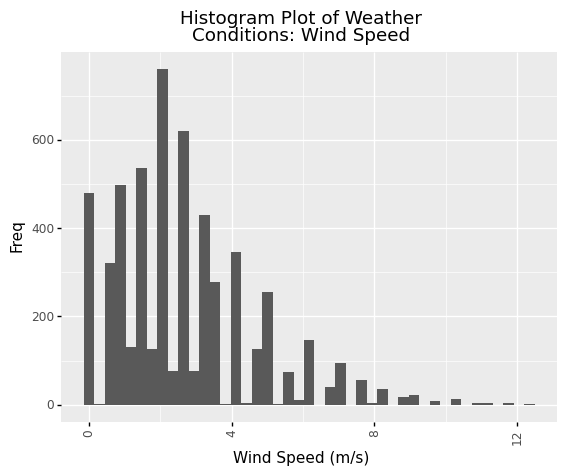

<ggplot: (8759871509709)>

In [140]:
(
  ggplot(weather) +
  geom_histogram(aes(x="wind_speed"),
             show_legend=False) +
  theme(axis_text_x=element_text(rotation=90)) +
  labs(x="Wind Speed (m/s)", y="Freq",
       title="Histogram Plot of Weather\n" + 
       "Conditions: Wind Speed")
)

/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/home/jaa6766/.conda/envs/cuda/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 15'. Pick better value with 'binwidth'.


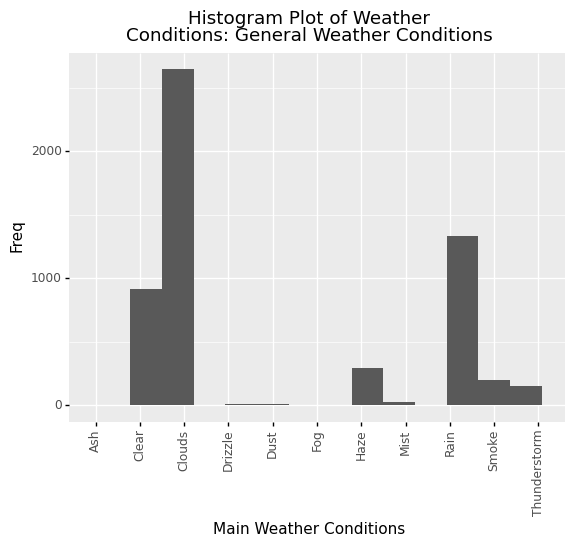

<ggplot: (8759872072773)>

In [136]:
(
  ggplot(weather) +
  geom_histogram(aes(x="weather_main"),
             show_legend=False) +
  theme(axis_text_x=element_text(rotation=90)) +
  labs(x="Main Weather Conditions", y="Freq",
       title="Histogram Plot of Weather\n" + 
       "Conditions: General Weather Conditions")
)

## References

* [Bosch BME680 Datasheet](https://www.bosch-sensortec.com/media/boschsensortec/downloads/datasheets/bst-bme680-ds001.pdf). 2021.

* Mancuso, Daniel. [Indoor Air Quality Monitor | Hackster.io](https://www.hackster.io/damancuso/indoor-air-quality-monitor-b181e9). 2019.

* [OpenWeatherData: History Bulk weather data Documentation](https://openweathermap.org/history-bulk)